In [2]:
import numpy as np 
import matplotlib.pyplot as plt

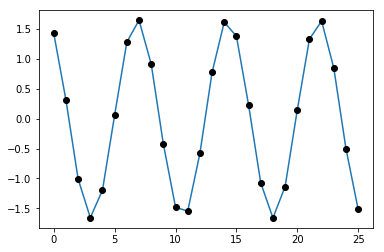

In [65]:
# Constants
N = 26
C = 1.0
m = 1.0

#In case of unequal masses, create an array containing the values here 

k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

#In case of damping, specify a damping constant $\gamma$ here, and alphs becomes: 
#alpha = np.complex(2*k-m*omega*omega,gamma*omega) 

# Set up the initial values of the arrays
A = np.zeros([N,N],float)
for i in range(N-1):
    
    # If you have unequal masses, the matrix A needs to be changed suitably 
    
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k
A[0,0] = alpha - k
A[N-1,N-1] = alpha - k

v = np.zeros(N,float)
v[0] = C

# Perform the Gaussian elimination
for i in range(N-1):

    # Divide row i by its diagonal element
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]

    # Now subtract it from the next row down
    A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]

# Divide the last element of v by the last diagonal element
v[N-1] /= A[N-1,N-1]

# Backsubstitution
x = np.empty(N,float)
x[N-1] = v[N-1]
for i in range(N-2,-1,-1):
    x[i] = v[i] - A[i,i+1]*x[i+1]
    
# If your matrix A is complex then you can find x using the following command. 
# x = np.matmul(np.linalg.inv(A), v)
# Refer to complex matrix.ipynb in the Recitation 7 repo    


# Make a plot using both dots and lines
plt.plot(x)
plt.plot(x,"ko")
plt.show()